<a href="https://colab.research.google.com/github/nicolas-sacco/Statistical-Arbitrage/blob/main/Statistical_Arbitrage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Mean Reversion - Statisitcal Arbitrage


##Objective: Capitalize on statistical divergences from historical relationships between two equities.


##Steps:

1. Get Data: Clean, normalize, and get data in a form that we can feed into our model
2. Identify High Correlation between two equities using a ρ-value heatmap
3. Develop Algorithm: Backtest model to find past statistical deviations between the two equites
4. Analyze Performance: Evaluate performance of our Algorithm






# Explanation of Strategy
Statistical arbitrage is a trading strategy leveraging **correlation coefficients** and **z-scores** to exploit temporary mispricings in asset relationships. We identify pairs of assets with historically high positive correlation, signaling a tendency to move together. Z-scores quantify the difference between current and historical spreads, offering insights into potential overvaluation or undervaluation. The strategy assumes the "mean-reversion principle", anticipating that prices will revert to their historical norms over time. In summary, the strategy aims to **long the undervalued equity & short the overvalued equity**.

For this project, the criteria for entering the short/long position is the following:


*   **|Z-score_A - Z-score_B|>1**
*   **ρ > 0.80 ***









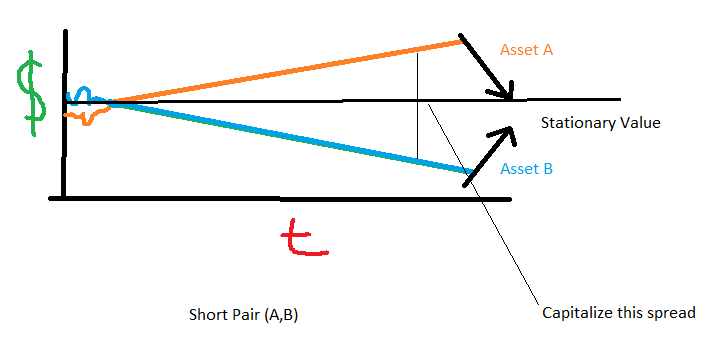
  
)

### **Correlation Coefficient(ρ)** - A statistical measure that quantifies the strength and direction of the relationship between two variables. It indicates how closely the changes in one variable are associated with changes in another variable. The correlation coefficient typically ranges between -1 and 1.

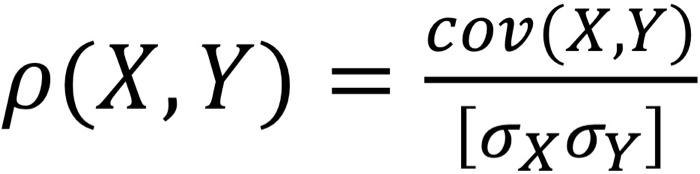

### **Z-Score** - A statistical measure that quantifies the distance (standard deviations) between a data point and the mean of a dataset. It is used to determine how many standard deviations an individual data point is from the mean of the dataset.

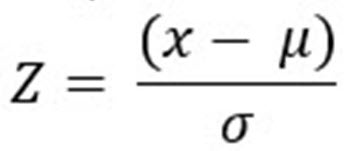

###**Equities Analyzed:**

  Quantitative Finance Lab required me to select a maximum of 18 symbols; all with large market capitalization and pairs within the same industry. I selected the following companies/industries to analyze:

  | Symbol      | Name | Industry       |
|-----------|-----|------------------|
| JPM      | J.P Morgan   | Financial  |
| BAC     | Bank of America  | Financial         |
| AAPL       | Apple  | Tech          |
| MSFT      | Microsoft  | Tech         |
| META      | Meta  | Tech          |
| GOOG     | Google  | Tech        |
| KO     | Coca-Cola  | Consumer Staple       |
| PEP    | Pepsi  | Consumer Staple       |
| PG    | Procter & Gamble  | Consumer Staple        |
| WMT     | Walmart  | Retail            |
| TGT      | Target  | Retail|
| AMZN       | Amazon  | Retail   |
| TSLA     | Tesla  | Automobile  |
| GM       | General Motors  | Automobile    |
| BRK.B      | Berkshire Hathaway  | ETF        |
| SPY  | S&P 500  |  ETF |
| V     | Visa  | Credit Card    |
| MA    | Mastercard  | Credit Card   |




### **Importing Neccesary Libraries**

In [21]:
#STEP 1: GET DATA

# Getting Data from 2021-2024
# I will get the adjusted close as my main data.

##import neccesary libraries for the project
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sn

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2021, 1, 14), end=datetime(2024, 1, 14)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["JPM", "BAC", "AAPL", "MSFT", "META", "GOOG", "KO", "PEP","PG","WMT","TGT","AMZN","TSLA","GM", "BRK-B", "SPY" ,"V","MA"] #companies selected to analyze
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data (2024)
d.tail()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

(754, 18)


,JPM,BAC,AAPL,MSFT,META,GOOG,KO,PEP,PG,WMT,TGT,AMZN,TSLA,GM,BRK-B,SPY,V,MA
Date,,,,,,,,,,,,,,,,,,
2024-01-08,172.020004,34.160000,185.323517,373.998383,358.660004,140.529999,60.110001,169.110001,147.756851,158.250000,141.729996,149.100006,240.449997,36.700001,368.179993,474.600006,262.051361,421.980011
2024-01-09,170.660004,33.630001,184.904053,375.096375,357.429993,142.559998,60.000000,167.169998,148.363022,159.309998,143.770004,151.369995,234.960007,36.540001,366.899994,473.880005,262.839874,422.600006
2024-01-10,171.020004,33.599998,185.952713,382.063446,370.470001,143.800003,60.200001,166.919998,148.999008,161.289993,144.089996,153.729996,233.940002,36.310001,367.920013,476.559998,264.067596,428.269989
2024-01-11,170.300003,33.150002,185.353485,383.920044,369.670013,143.669998,59.810001,166.130005,149.565414,161.110001,142.020004,155.179993,227.220001,35.860001,363.339996,476.350006,263.538574,426.720001
2024-01-12,169.050003,32.799999,185.683060,387.752960,374.489990,144.240005,60.389999,167.270004,149.654861,161.320007,140.910004,154.619995,218.889999,35.259998,363.619995,476.679993,263.678345,429.100006


In [22]:
##method .corr() calculates Pearson correlation coefficient of all assets

corr_matrix = d.corr()
corr_matrix

,JPM,BAC,AAPL,MSFT,META,GOOG,KO,PEP,PG,WMT,TGT,AMZN,TSLA,GM,BRK-B,SPY,V,MA
JPM,1.000000,0.349092,0.283316,0.587771,0.793627,0.608711,-0.271147,-0.111976,0.186922,0.467289,0.219783,0.518012,0.118767,0.399875,0.304034,0.744538,0.705312,0.654705
BAC,0.349092,1.000000,-0.257635,-0.067776,0.273578,0.427177,-0.325090,-0.423219,-0.114205,-0.364260,0.831029,0.587973,0.500697,0.774684,-0.271530,0.276918,-0.173872,-0.214554
AAPL,0.283316,-0.257635,1.000000,0.872789,0.221090,0.498618,0.560738,0.686291,0.776382,0.689411,-0.390614,-0.042408,0.311683,-0.468799,0.812793,0.741622,0.526832,0.564527
MSFT,0.587771,-0.067776,0.872789,1.000000,0.568413,0.751163,0.292583,0.427222,0.664925,0.681703,-0.175683,0.253351,0.352184,-0.215701,0.715557,0.901364,0.662060,0.649451
META,0.793627,0.273578,0.221090,0.568413,1.000000,0.760032,-0.487616,-0.365296,0.013609,0.311012,0.354739,0.788389,0.309720,0.498765,0.075538,0.669684,0.589641,0.502539
GOOG,0.608711,0.427177,0.498618,0.751163,0.760032,1.000000,-0.103393,-0.064399,0.364414,0.318022,0.365819,0.699981,0.602118,0.277798,0.350910,0.853134,0.449451,0.384761
KO,-0.271147,-0.325090,0.560738,0.292583,-0.487616,-0.103393,1.000000,0.897980,0.760634,0.329060,-0.443799,-0.654028,-0.147602,-0.713356,0.679115,0.181084,0.130645,0.204702
PEP,-0.111976,-0.423219,0.686291,0.427222,-0.365296,-0.064399,0.897980,1.000000,0.769439,0.521330,-0.544058,-0.651439,-0.148980,-0.715437,0.710913,0.271378,0.207326,0.268873
PG,0.186922,-0.114205,0.776382,0.664925,0.013609,0.364414,0.760634,0.769439,1.000000,0.620115,-0.262270,-0.244837,0.138403,-0.460091,0.821857,0.614447,0.379614,0.471365
WMT,0.467289,-0.364260,0.689411,0.681703,0.311012,0.318022,0.329060,0.521330,0.620115,1.000000,-0.354245,-0.075296,-0.040171,-0.394907,0.772655,0.602019,0.655665,0.670040


#**ρ-value Heatmap**

Visualizes correlation coefficient for each asset to easily analyze the data and identify the strongest correlation

<Axes: >

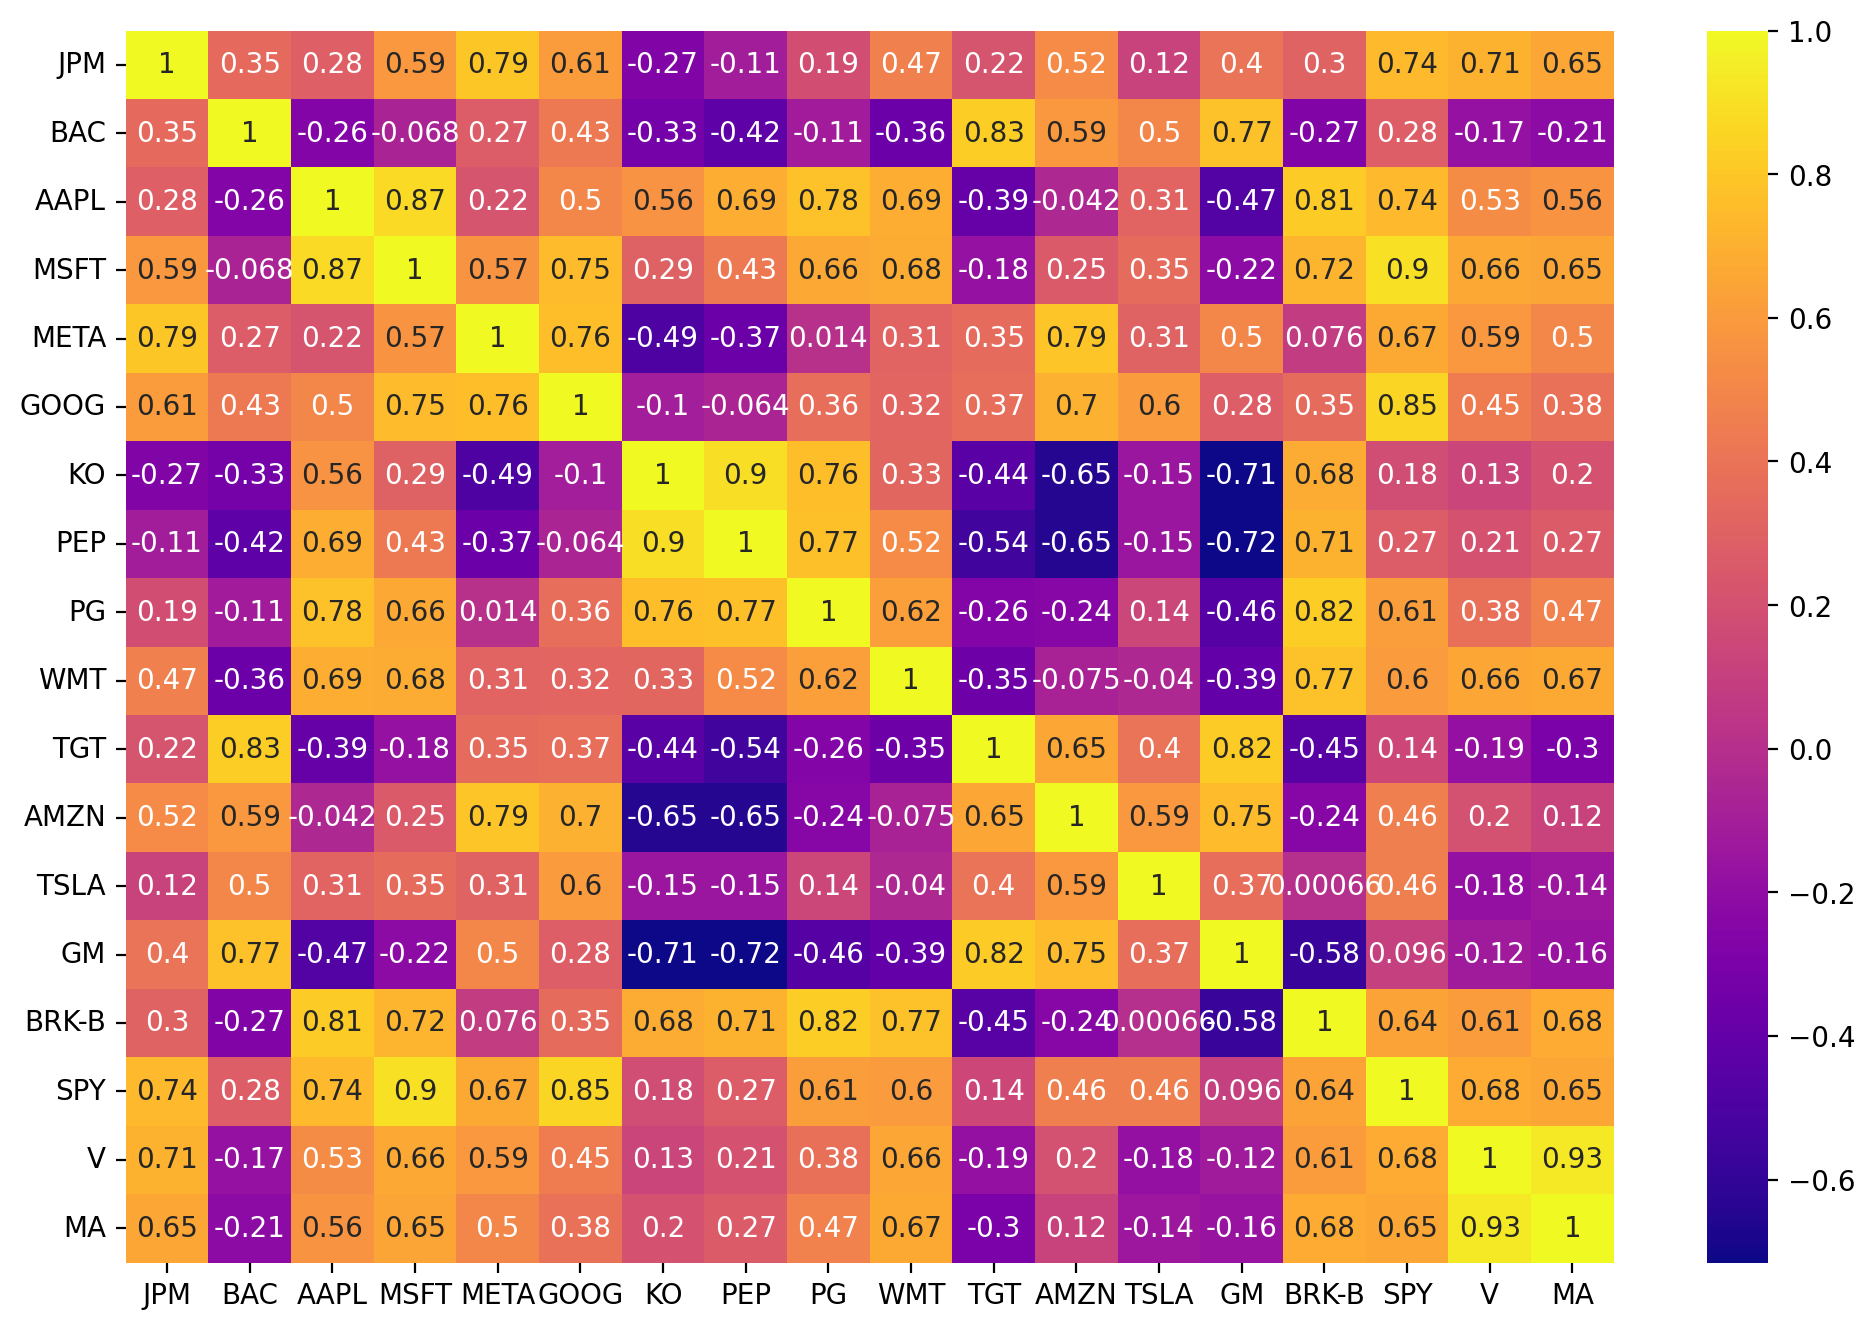

In [23]:
# Let's heatmap this matrix so that we can have a better sense of what is going on
import seaborn as sn
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=200)
sn.heatmap(corr_matrix,cmap= "plasma", annot = True)

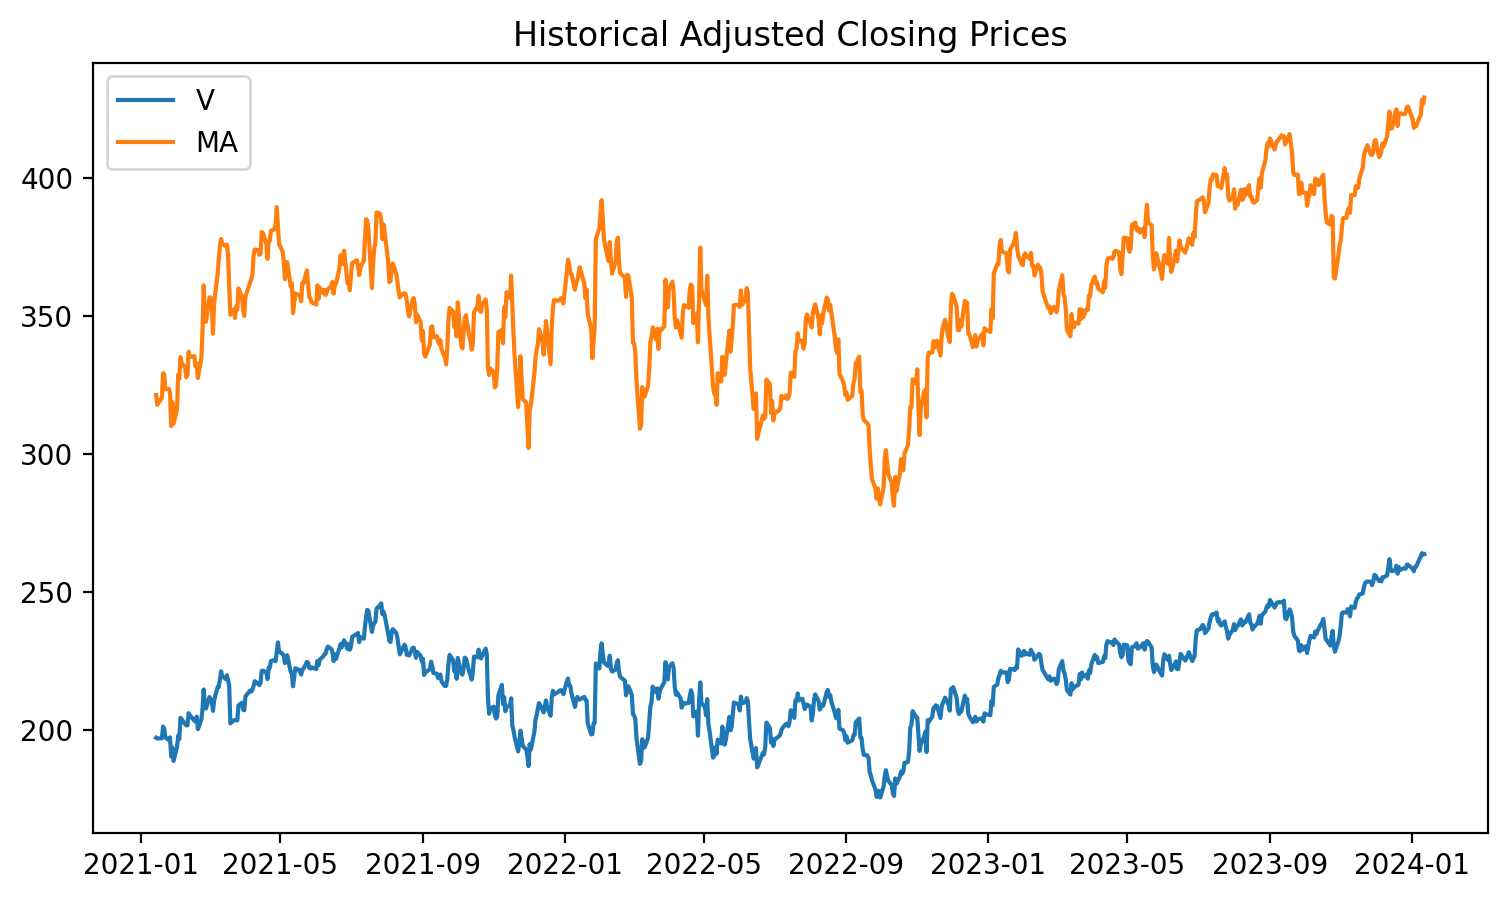

In [24]:
# Correlation of Visa and Mastercard ~ 0.93
figure(figsize=(9, 5), dpi=200)
V = d['V']
MA = d['MA']
plt.plot(V, label = "V")
plt.plot(MA, label = "MA")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

NOTE: Although these are highly correlated assets; the graph shows no intersection so it may be hard to find a long/short oppurtunity. I am going to analyze another highly correlated pair to analyze if there is more apparent oppurtunity.

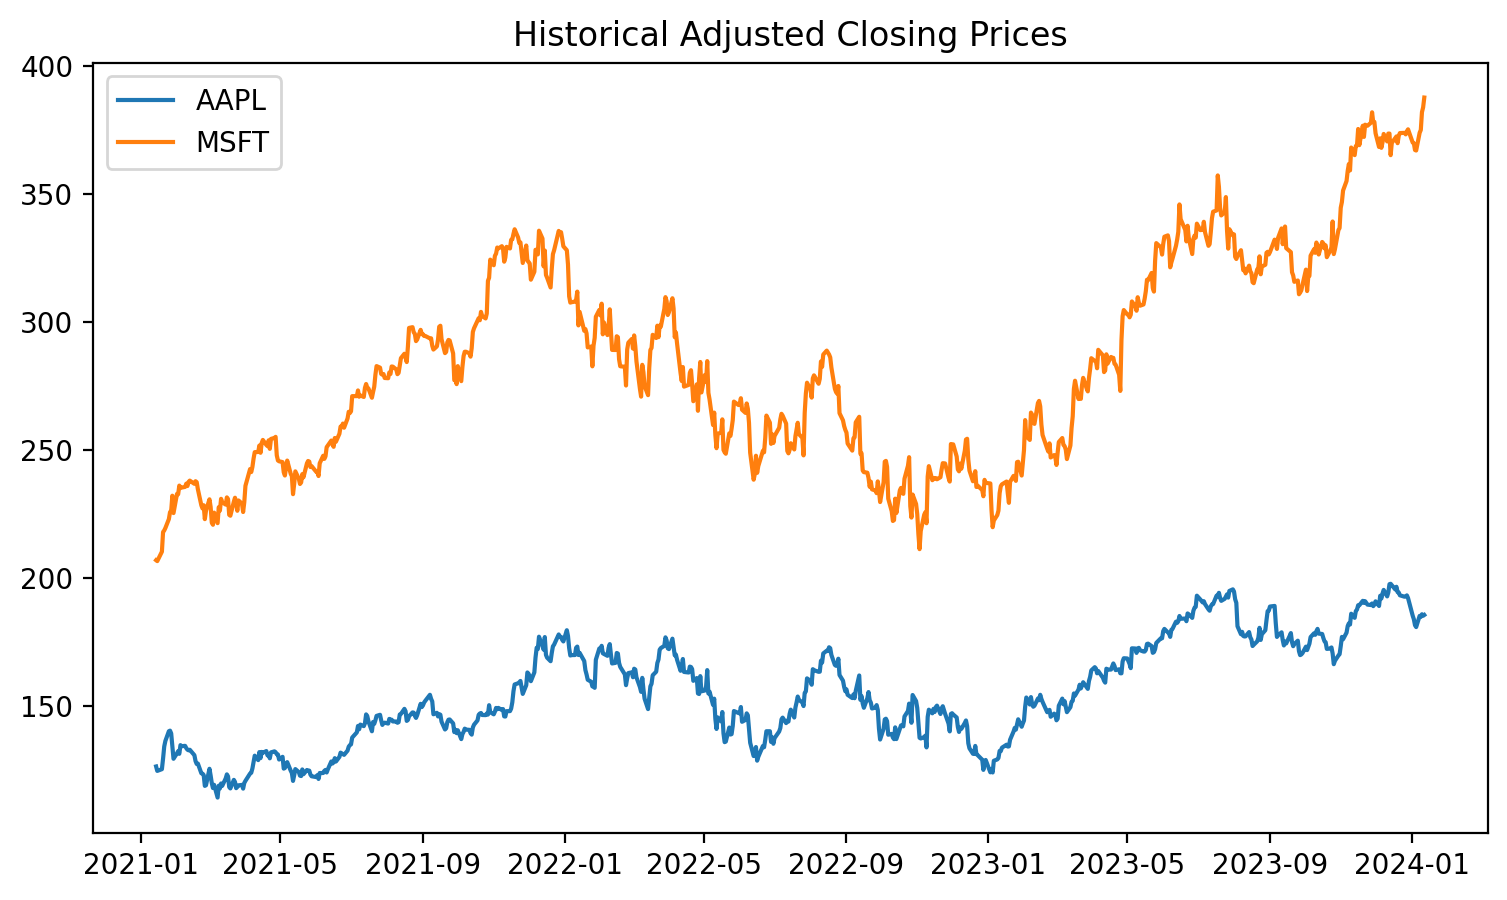

In [25]:
# Correlation of Apple and Microsoft ~ 0.87
figure(figsize=(9, 5), dpi=200)
AAPL = d['AAPL']
MSFT = d['MSFT']
plt.plot(AAPL, label = "AAPL")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

NOTE: I can visually see more oppurtunities where the prices of AAPL and GOOG deviated in opposite directions so lets try and quanitfy this relationship moving forward in the project


Importing MSFT data into a dataframe

In [26]:
msft = yf.download('MSFT', start='2021-01-14', end='2024-02-14')
msft['z-score']= ((msft['Adj Close'] - msft['Adj Close'].rolling(window=200).mean())/msft['Adj Close'].rolling(window=200).std())
msft['avg 200day z-score']= msft['z-score'].rolling(window=200).mean()
msft = msft.dropna(subset=['avg 200day z-score'])
msft.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,z-score,avg 200day z-score
Date,,,,,,,,
2022-08-15,291.000000,294.179993,290.109985,293.470001,288.924530,18085700,-0.005288,-0.125887
2022-08-16,291.989990,294.040009,290.420013,292.709991,288.176331,18102900,-0.027665,-0.137006
2022-08-17,289.739990,293.350006,289.470001,291.320007,287.416656,18253400,-0.049210,-0.149400
2022-08-18,290.190002,291.910004,289.079987,290.170013,286.282043,17186200,-0.085147,-0.161409
2022-08-19,288.899994,289.250000,285.559998,286.149994,282.315887,20570000,-0.226560,-0.174631
2022-08-22,282.079987,282.459991,277.220001,277.750000,274.028381,25061100,-0.530844,-0.189328
2022-08-23,276.440002,278.859985,275.399994,276.440002,272.735992,17527400,-0.572048,-0.204457
2022-08-24,275.410004,277.230011,275.109985,275.790009,272.094727,18137000,-0.588747,-0.219398
2022-08-25,277.329987,279.019989,274.519989,278.850006,275.113678,16583400,-0.465822,-0.233677


Importing AAPL data into a dataframe

In [27]:
aapl= yf.download('AAPL', start='2021-01-14', end='2024-02-14')
aapl['z-score']= ((aapl['Adj Close'] - aapl['Adj Close'].rolling(window=200).mean())/aapl['Adj Close'].rolling(window=200).std())
aapl['avg 200day z-score']= aapl['z-score'].rolling(window=200).mean()
aapl = aapl.dropna(subset=['avg 200day z-score'])
aapl.head(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,z-score,avg 200day z-score
Date,,,,,,,,
2022-08-15,171.520004,173.389999,171.350006,173.190002,171.723007,54091700,1.091938,0.600018
2022-08-16,172.779999,173.710007,171.660004,173.029999,171.564346,56377100,1.068568,0.597357
2022-08-17,172.770004,176.149994,172.570007,174.550003,173.071457,79542000,1.177830,0.596666
2022-08-18,173.750000,174.899994,173.119995,174.149994,172.674850,62290100,1.134327,0.596231
2022-08-19,173.029999,173.740005,171.309998,171.520004,170.067139,70346300,0.915610,0.594257
2022-08-22,169.690002,169.860001,167.139999,167.570007,166.150604,69026800,0.594510,0.590048
2022-08-23,167.080002,168.710007,166.649994,167.229996,165.813461,54147100,0.561043,0.585994
2022-08-24,167.320007,168.110001,166.250000,167.529999,166.110916,53841500,0.578601,0.581836
2022-08-25,168.779999,170.139999,168.350006,170.029999,168.589752,51218200,0.770284,0.579083


Data Frame for the difference in Z-scores between AAPL and MSFT

In [28]:

# Create an empty DataFrame
df = pd.DataFrame()

# Calculate the absolute difference between the 200-day rolling average z-scores
df['z-score'] = pd.DataFrame(abs(aapl['z-score'] - msft['z-score']))

# Create 'apple position' and 'microsoft position' columns based on conditions
df["apple position"] = 0  # Default position is 0
df["microsoft position"] = 0  # Default position is 0

# Create a new column for integer representation of the datetime index
df["int_index"] = df.index.astype(int)

# Separate conditions for entry and exit
condition_index = df["int_index"] > 1
condition_entry = df['z-score'].shift(1).abs() > 1.3
condition_exit = df['z-score'].shift(1).abs() < 1

# Determine higher and lower z-score
higher_z_score = aapl['z-score'].shift(1) > msft['z-score'].shift(1)

# Apply conditions and update positions
df.loc[condition_index & condition_entry, "apple position"] = (aapl['z-score'].shift(1) > msft['z-score'].shift(1)).astype(int)
df.loc[condition_index & condition_entry, "microsoft position"] = -1 * (aapl['z-score'].shift(1) > msft['z-score'].shift(1)).astype(int)

# Exit positions when the difference is less than 0.43
df.loc[condition_index & condition_exit, ["apple position", "microsoft position"]] = 0

df = df.drop(columns=["int_index"])  # Drop the auxiliary column

apple_position_count = (df['apple position'] == 1).sum()

print("Number of times 'apple position' is equal to 1:", apple_position_count)

df.head(10)


Number of times 'apple position' is equal to 1: 4


,z-score,apple position,microsoft position
Date,,,
2022-08-15,1.097226,0,0
2022-08-16,1.096233,0,0
2022-08-17,1.227040,0,0
2022-08-18,1.219475,0,0
2022-08-19,1.142170,0,0
2022-08-22,1.125354,0,0
2022-08-23,1.133091,0,0
2022-08-24,1.167348,0,0
2022-08-25,1.236106,0,0


**1 - Long Position**

**-1 - Short Position**

**0 - No Position**

## **Statistical Arbitrage Historical Evaluation**

Evaluate the model that we have created and visualize its performance historically

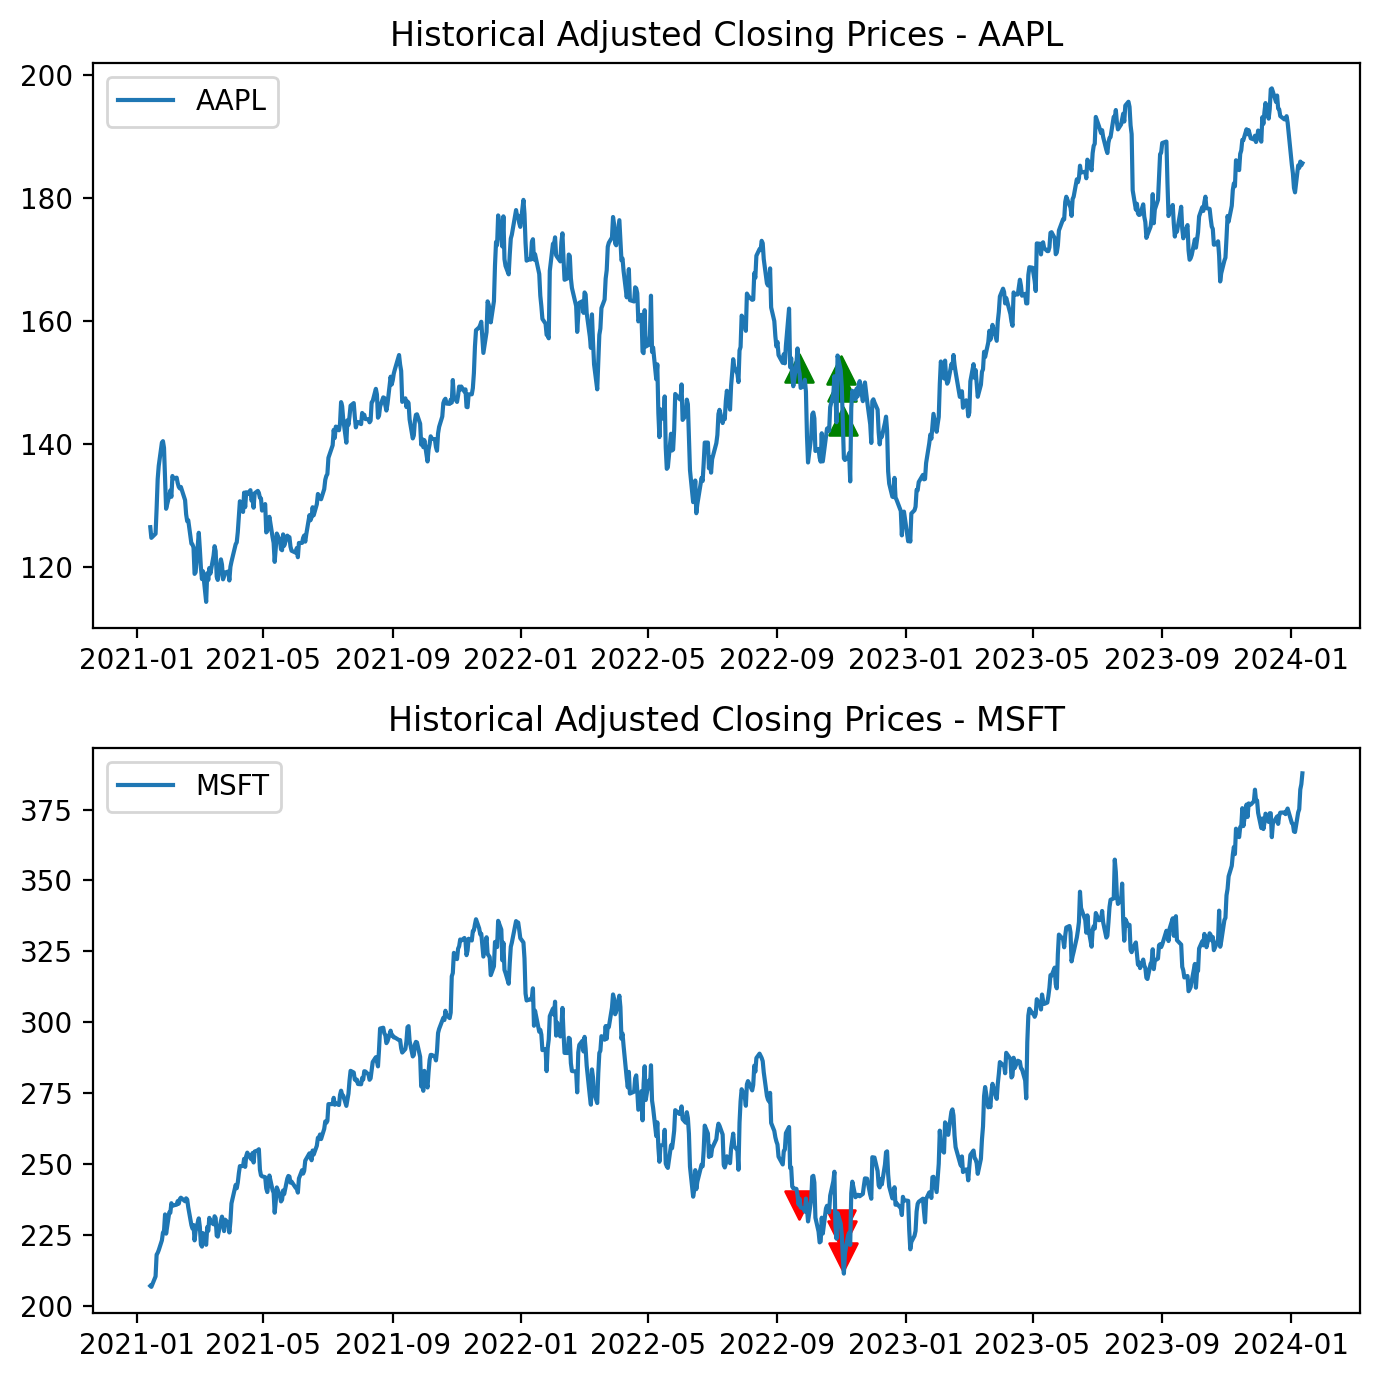

In [29]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

# Correlation of Apple and Microsoft ~ 0.87
figure(figsize=(7, 7), dpi=200)

# Create subplots
plt.subplot(2, 1, 1)  # Apple subplot
AAPL = d['AAPL']
plt.plot(AAPL, label="AAPL")
plt.title('Historical Adjusted Closing Prices - AAPL')
plt.legend()

# Plot arrows for Apple positions
apple_positions = df['apple position']
apple_entry_points = apple_positions[apple_positions != 0].index

# Green '^' arrows for Long Entry in Apple
plt.scatter(apple_entry_points, AAPL.loc[apple_entry_points], marker='^', color='g', label='Long Entry',s=100)

plt.subplot(2, 1, 2)  # Microsoft subplot
MSFT = d['MSFT']
plt.plot(MSFT, label="MSFT")
plt.title('Historical Adjusted Closing Prices - MSFT')
plt.legend()

# Plot arrows for Microsoft positions
microsoft_positions = df['microsoft position']
microsoft_entry_points = microsoft_positions[microsoft_positions != 0].index

# Red 'v' arrows for Short Entry in Microsoft
plt.scatter(microsoft_entry_points, MSFT.loc[microsoft_entry_points], marker='v', color='r', label='Short Entry',s=100)

plt.tight_layout()
plt.show()


Lets get a closer look at the time the indicator went short/long:

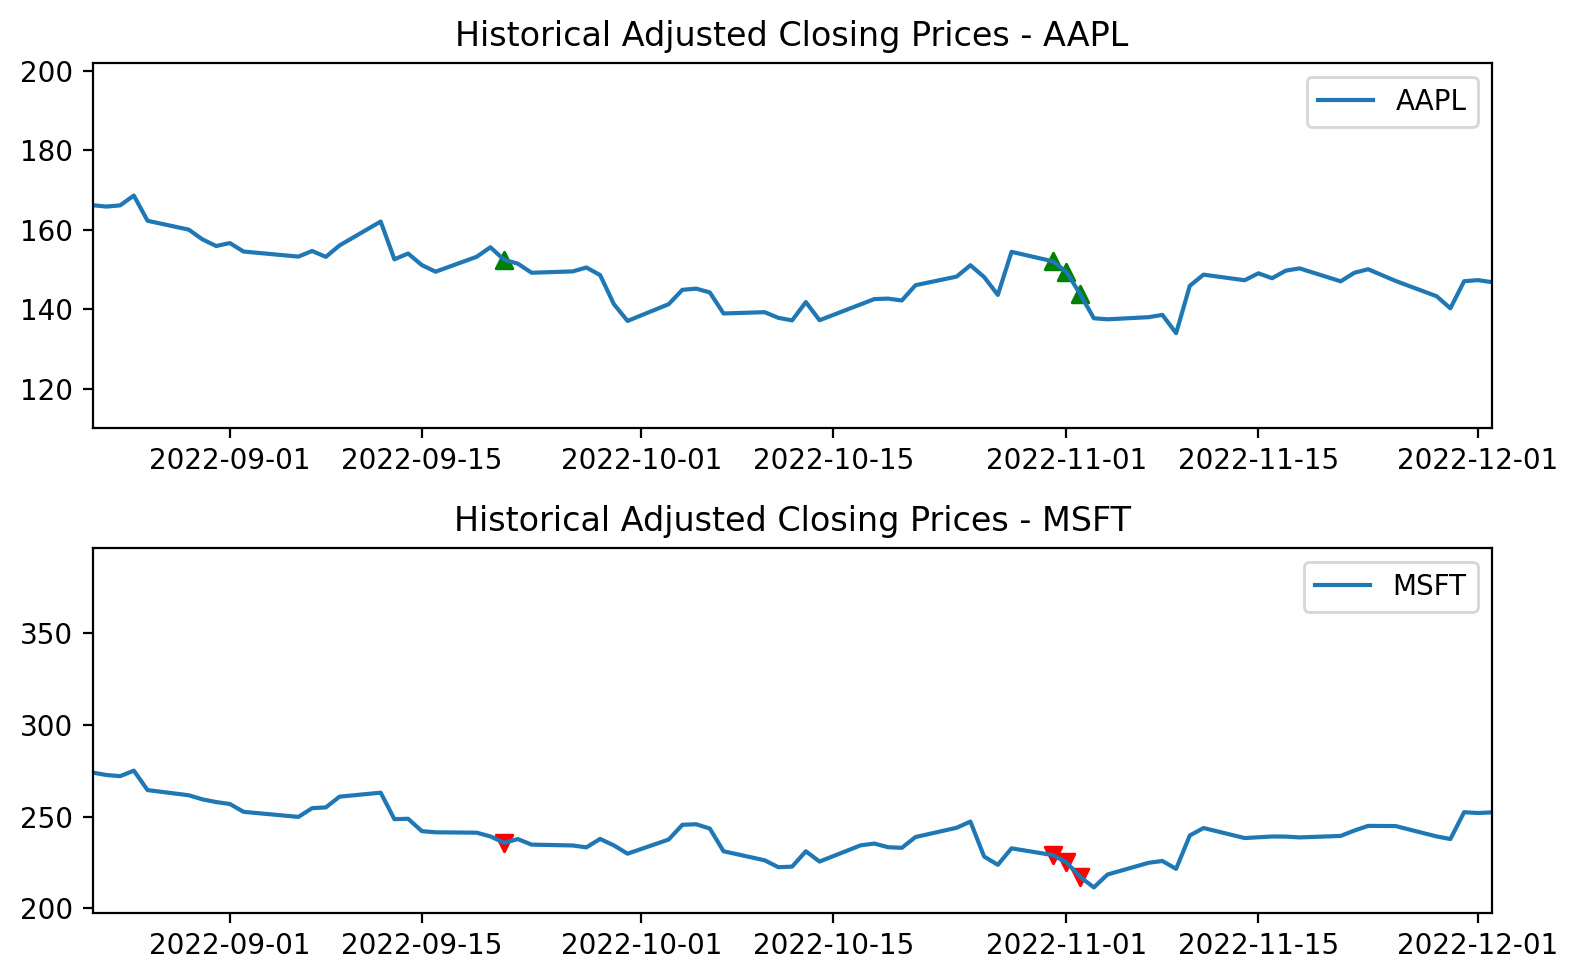

In [30]:
figure(figsize=(8, 5), dpi=200)

# Create subplots
plt.subplot(2, 1, 1)  # Apple subplot
AAPL = d['AAPL']
plt.plot(AAPL, label="AAPL")
plt.title('Historical Adjusted Closing Prices - AAPL')
plt.legend()

# Plot arrows for Apple positions
apple_positions = df['apple position']
apple_entry_points = apple_positions[apple_positions != 0].index

# Green '^' arrows for Long Entry in Apple
plt.scatter(apple_entry_points, AAPL.loc[apple_entry_points], marker='^', color='g', label='Long Entry')

# Limit x-axis to 60 days range
plt.xlim(apple_entry_points[0] - pd.Timedelta(days=30), apple_entry_points[-1] + pd.Timedelta(days=30))

plt.subplot(2, 1, 2)  # Microsoft subplot
MSFT = d['MSFT']
plt.plot(MSFT, label="MSFT")
plt.title('Historical Adjusted Closing Prices - MSFT')
plt.legend()

# Plot arrows for Microsoft positions
microsoft_positions = df['microsoft position']
microsoft_entry_points = microsoft_positions[microsoft_positions != 0].index

# Red 'v' arrows for Short Entry in Microsoft
plt.scatter(microsoft_entry_points, MSFT.loc[microsoft_entry_points], marker='v', color='r', label='Short Entry')

# Limit x-axis to 60 days range
plt.xlim(microsoft_entry_points[0] - pd.Timedelta(days=30), microsoft_entry_points[-1] + pd.Timedelta(days=30))

plt.tight_layout()
plt.show()

In [31]:
# Identify start and end dates based on indicator signals
start_date = df.index[df['microsoft position'] == -1].min()  # Start date for shorting MSFT
end_date = df.index[df['apple position'] == 1].max()  # End date for longing AAPL

# Filter AAPL and MSFT data for the specified timeframe
aapl_filtered = aapl.loc[start_date:end_date]
msft_filtered = msft.loc[start_date:end_date]

# Calculate returns for shorting MSFT and longing AAPL
msft_short_return = msft_filtered.iloc[0]['Adj Close'] - msft_filtered.iloc[-1]['Adj Close']  # Negative return for shorting MSFT
aapl_long_return = aapl_filtered.iloc[-1]['Adj Close'] - aapl_filtered.iloc[0]['Adj Close']

# Create DataFrame for net return
net_return_df = pd.DataFrame({
    'Stock': ['MSFT', 'AAPL'],
    'Position': ['Short', 'Long'],
    'Return': [msft_short_return, aapl_long_return]
})

# Display the net return DataFrame
print(net_return_df)


  Stock Position     Return
0  MSFT    Short  18.597443
1  AAPL     Long  -8.616394


## **Backtesting Strategy Cummulative Returns vs. Traditional Buy/Hold**

Let us compare the statistical arbitrage returns and the traditional buy and hold strategy to see which startegy performed better in this time interval:

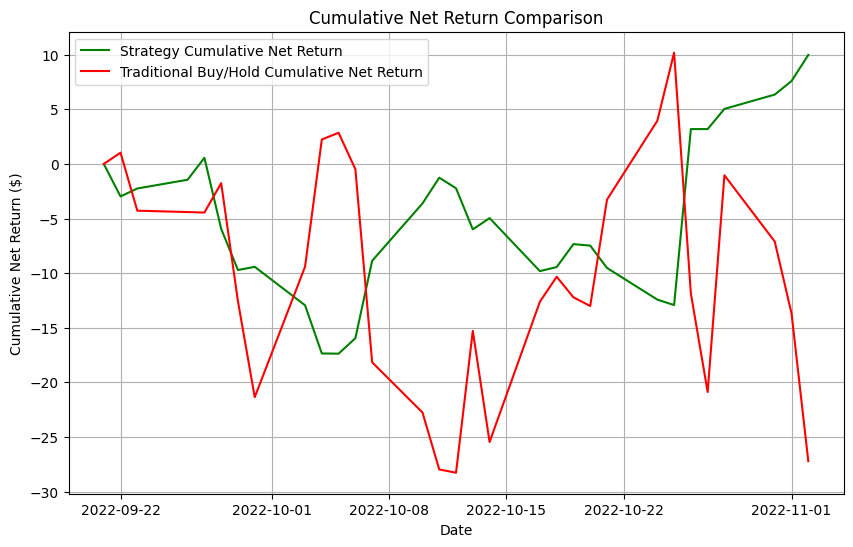

In [32]:
# Slice the AAPL and MSFT data to cover the specified time frame
aapl_slice = aapl_filtered.loc[start_date:end_date]
msft_slice = msft_filtered.loc[start_date:end_date]

# Calculate the absolute difference in prices between AAPL and MSFT for each day
returns_strategy = aapl_slice['Adj Close'] - msft_slice['Adj Close']

# Subtract the first day's absolute difference from all subsequent days to start with $0 return on the first day
returns_strategy = returns_strategy - returns_strategy.iloc[0]

# Calculate cumulative net return from longing both AAPL and MSFT simultaneously
cumulative_return_long_both = (msft_filtered['Adj Close'] - msft_filtered.iloc[0]['Adj Close']) + (aapl_filtered['Adj Close'] - aapl_filtered.iloc[0]['Adj Close'])

# Plot cumulative net return over time for both positions
plt.figure(figsize=(10, 6))

# Plot cumulative net return from shorting MSFT and longing AAPL simultaneously
plt.plot(returns_strategy.index, returns_strategy, label='Strategy Cumulative Net Return ', color='green')

# Plot cumulative net return from longing both AAPL and MSFT simultaneously
plt.plot(cumulative_return_long_both.index, cumulative_return_long_both, label='Traditional Buy/Hold Cumulative Net Return', color='red')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Cumulative Net Return ($)')
plt.title('Cumulative Net Return Comparison')
plt.legend()

# Show plot
plt.grid(True)
plt.show()





Conclusion: The statistical arbitrage strategy yielded a **2.5%** return in a two-month time period where a traditional investor would have been down **-6.25%.** We can quantify this discrepancy by stating the following: The Cummulative Net Return of the Statistical Arbitrage Strategy performed  better than the Traditional Buy/Hold Strategy in a 2 Month Period. **We succesfully capitalized on the statistical divergence between these two highly correlated assets.**

To better this strategy it is important to run additonal test cases to ensure the validity of the Statistical Arbitrage Strategy